<a href="https://colab.research.google.com/github/hoangnhan12-arc/CS114.K21.KHTN/blob/master/FinalMachineLearningReportandCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ĐỒ ÁN CUỐI KÌ MÔN MÁY HỌC : PHÂN LOẠI ĐỀ TÀI DỰA VÀO TIÊU ĐỀ BÀI BÁO**


#**I. Mô tả bài toán:** 
##Đặt vấn đề:
> Mạng xã hội ngày càng phát triển, các fanpage group xuất hiện ngày càng nhiều, với mục đích trao đổi, thảo luận, chia sẻ kinh nghiệm,... Với số lượng bài viết lớn và nhiều đề tài cần quản lý thì việc phân loại bài viết là hết sức cần thiết. Việc phân loại bài viết có thể được chính chúng ta đọc bài và phân chia vào từng loại chủ đề khác nhau, nhưng việc này tốn khá nhiều thời gian và công sức cũng như tiền bạc để chi trả cho các admin page.

##Giải quyết vấn đề:
> Nếu chúng ta có một hệ thống tự động giúp phân loại các bài viết dựa vào tiêu đề thì sẽ giải quyết được nhiều vấn đề ở trên( tiết kiệm thời gian, công sức và tiền bạc). Ta sẽ xây dựng một mô hình tiên đoán, giúp phân loại chủ đề bài viết dựa vào tiêu đề bài viết.

##Mô tả mô hình:
>Input: Một tiêu đề bài viết bất kì 

>Output: Tiêu đề đó thuộc chủ đề nào






                     


# **II. MÔ TẢ DỮ LIỆU**




## 1. Chia lớp chủ đề: 
>Có 6 class dữ liệu:


> *   Chính trị
> *   Công nghệ
> *   Giáo dục
> *   Pháp luật
> *   Thể thao
> *   Kinh doanh

## 2. Nguồn thu thập dữ liệu:
>Dữ liệu được crawl từ trang vietnemnet.vn



## 3. Cách thu thập dữ liệu:

***Khởi tạo hàm lấy content từ một trang web***

In [ ]:
!pip install pyvi

In [ ]:
import bs4
import pandas
import requests
import gensim 
from pyvi import ViTokenizer, ViPosTagger

def get_page_content(url):
   page = requests.get(url,headers={'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.106 Safari/537.36'})
   return bs4.BeautifulSoup(page.text,"html.parser")

***Ví dụ crawl data chính trị***

In [ ]:
chinhtri_titles = []
for i in range (1, 501):
  url = "https://vietnamnet.vn/vn/thoi-su/chinh-tri/trang{}".format(i)   #Load từ trang 1 đến trang 500 mục chính trị
  soup = get_page_content(url)        #Lấy content từ một trang web
  h3_contents = soup.findAll('h3')     #Tìm mục h3

  new_titles = []
  for h3_content in h3_contents:
    if (h3_content.find('a')):          # Kiểm tra điều kiện để tránh bị lỗi trong quá trình crawl data
      text = h3_content.find('a').text  # Trích xuất title 
      new_titles.append(text)
  
  chinhtri_titles += new_titles
chinhtri_titles = list(set(chinhtri_titles))  # Loại bỏ các bộ trùng bằng kiểu dữ liệu set

print(len(chinhtri_titles))

*** Crawl data về kinh doanh***

In [ ]:
kinhdoanh_titles = []
for i in range (1, 501):
  url = "https://vietnamnet.vn/vn/kinh-doanh/trang{}".format(i)   #Load từ trang 1 đến trang 500 mục kinh doanh
  soup = get_page_content(url)        #Lấy content từ một trang web
  h3_contents = soup.findAll('h3')     #Tìm mục h3

  new_titles = []
  for h3_content in h3_contents:
    if (h3_content.find('a')):          # Kiểm tra điều kiện để tránh bị lỗi trong quá trình crawl data
      text = h3_content.find('a').text  # Trích xuất title 
      new_titles.append(text)
  
  kinhdoanh_titles += new_titles
  
kinhdoanh_titles = list(set(kinhdoanh_titles))  # Loại bỏ các bộ trùng bằng kiểu dữ liệu set

print(len(kinhdoanh_titles))

*** Crawl data về thể thao***

In [ ]:
thethao_titles = []
for i in range (1, 501):
  url = "https://vietnamnet.vn/vn/the-thao/trang{}".format(i)
  soup = get_page_content(url)
  h3_contents = soup.findAll('h3')
  
  new_titles = []
  for h3_content in h3_contents:
    if (h3_content.find('a')):
      text = h3_content.find('a').text
      new_titles.append(text)
  
  thethao_titles += new_titles
  
thethao_titles = list(set(thethao_titles))
print(len(thethao_titles))

***Crawl data về giáo dục***

In [ ]:
giaoduc_titles = []
for i in range (1, 501):
  url = "https://vietnamnet.vn/vn/giao-duc/trang{}".format(i)
  soup = get_page_content(url)
  h3_contents = soup.findAll('h3')
  
  new_titles = []
  for h3_content in h3_contents:
    if (h3_content.find('a')):
      text = h3_content.find('a').text
      new_titles.append(text)
  
  giaoduc_titles += new_titles
  
giaoduc_titles = list(set(giaoduc_titles))
print(len(giaoduc_titles))

***Crawl data về pháp luật***

In [ ]:
phapluat_titles = []
for i in range (1, 501):
  url = "https://vietnamnet.vn/vn/phat-luat/trang{}".format(i)
  soup = get_page_content(url)
  h3_contents = soup.findAll('h3')
  
  new_titles = []
  for h3_content in h3_contents:
    if (h3_content.find('a')):
      text = h3_content.find('a').text
      new_titles.append(text)
  
  phapluat_titles += new_titles
  
phapluat_titles = list(set(phapluat_titles))
print(len(phapluat_titles))

***Crawl data về công nghệ***

In [ ]:
congnghe_titles = []
for i in range (1, 501):
  url = "https://vietnamnet.vn/vn/cong-nghe/trang{}".format(i)
  soup = get_page_content(url)
  h3_contents = soup.findAll('h3')
  
  new_titles = []
  for h3_content in h3_contents:
    if (h3_content.find('a')):
      text = h3_content.find('a').text
      new_titles.append(text)
  
  congnghe_titles += new_titles
  
congnghe_titles = list(set(congnghe_titles))
print(len(xongnghe_titles))

Kết thúc crawl data

## **4. Tiền xử lí dữ liệu:**

> - Kiểm tra dữ liệu ta đã crawl về và thấy data hoàn toàn tốt, nên bước này không làm gì cả

## **5. Tổng kết dữ liệu:**

> *    Thể thao: 7499 tiêu đề
> *    Giáo dục: 7510 tiêu đề
> *    Công nghệ: 7520 tiêu đề
> *    Pháp luật: 7516 tiêu đề
> *    Chính trị: 7145 tiêu đề
> *    Kinh doanh: 7522 tiêu đề

> Tổng cộng: 44712 tiêu đề

## **6. Tỉ lệ phân chia dữ liệu**

> Train: 80%

> Test: 20%

# **III. Các bước tiến hành train data**

## 1.Xử lý dữ liệu:

In [ ]:
%pip install pyvi   

     |████████████████████████████████| 8.5MB 2.6MB/s 
     |████████████████████████████████| 747kB 42.9MB/s 


### **a) Tiến hành load dữ liệu:**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import os
# đọc các file chứa nội dung cần thiết
thethao = open('/content/drive/My Drive/NLP_data/TheThao/thethao_VNnet.txt','r')
giaoduc = open('/content/drive/My Drive/NLP_data/GiaoDuc/giaoduc_VNnet.txt','r')
phapluat = open('/content/drive/My Drive/NLP_data/PhapLuat/phapluat_VNnet.txt', 'r')
congnghe = open('/content/drive/My Drive/NLP_data/CongNghe/congnghe_VNnet.txt', 'r')
chinhtri = open('/content/drive/My Drive/NLP_data/ChinhTri/chinhtri_VNnet.txt', 'r')
kinhdoanh = open('/content/drive/My Drive/NLP_data/KinhDoanh/kinhdoanh_VNnet.txt', 'r')
kinhdoanh = kinhdoanh.read()
thethao = thethao.read()
giaoduc=giaoduc.read()
phapluat = phapluat.read()
congnghe = congnghe.read()
chinhtri = chinhtri.read()
# Tiến hành chia cắt data thành các tiêu đề khác nhau
thethao = thethao.split('\n')
giaoduc = giaoduc.split('\n')
phapluat = phapluat.split('\n')
congnghe = congnghe.split('\n')
chinhtri = chinhtri.split('\n')
kinhdoanh = kinhdoanh.split('\n')

In [ ]:
print(len(thethao))
print(len(giaoduc))
print(len(phapluat))
print(len(congnghe))
print(len(chinhtri))
print(len(kinhdoanh))
# kích thước các chủ đề

7499
7510
7516
7520
7145
7522


Biểu đồ phân phối dữ liệu

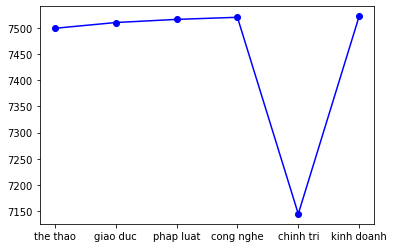

In [ ]:
import matplotlib.pyplot as plt
all_tiitles = ['the thao', 'giao duc', 'phap luat', 'cong nghe', 'chinh tri', 'kinh doanh']
size_of_titles = [len(thethao), len(giaoduc), len(phapluat), len(congnghe), len(chinhtri), len(kinhdoanh)]
plt.plot(all_tiitles, size_of_titles, 'bo-')

([<matplotlib.patches.Wedge at 0x7f53c80236a0>,
 [Text(0.2811905727710241, 1.063452801860385, 'the thao'),
  Text(-0.7860800356247842, 0.7694661640333109, 'giao duc'),
  Text(-1.0568407608548906, -0.30510261584531834, 'phap luat'),
  Text(-0.254279000249174, -1.0702066109085109, 'cong nghe'),
  Text(0.7868905826678866, -0.7686372427280597, 'chinhtri'),
  Text(1.0639058033581261, 0.27947171874968024, 'kinh doanh')])

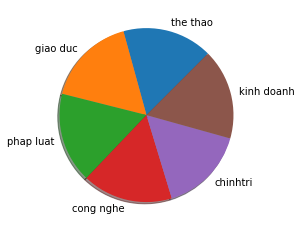

In [ ]:
plt.pie(size_of_titles,labels=all_tiitles, shadow=True, startangle=45)

> *    Sử dụng thư viện *ViTokenizer* để xử lí văn bản tiếng Việt, mục đích là tách từ. Ví dụ câu: "Ngôi trường mến yêu", sau khi dùng *ViTokenzier* để xử lý thì ta sẽ thu về "Ngôi trường mến_yêu". Khi này câu sẽ có 3 từ là ngôi, trường, mến yêu.

> *    Sử dụng *gensim* để loại bỏ những kí tự đặc biệt như: ".", ",", "!",..

In [ ]:
from pyvi import ViTokenizer # thư viện NLP tiếng Việt
import numpy as np
import gensim  #thư viện NLP
X = []
Y = []
train_data = []
for lines in thethao: #load data từ file the thao
  lines = gensim.utils.simple_preprocess(lines)  # loại bỏ các kí tự đặc biệt, không cần thiết
  lines = ' '.join(lines) 
  lines = ViTokenizer.tokenize(lines)   # tách câu ra thành các từ tiếng việt
  lines = ''.join(lines)
  
  X.append(lines)
  Y.append('the thao')

for lines in giaoduc: #load data từ file giáo dục
  lines = gensim.utils.simple_preprocess(lines)
  lines = ' '.join(lines) 
  lines = ViTokenizer.tokenize(lines)
  lines = ''.join(lines)
  
  X.append(lines)
  Y.append('giao duc')
for lines in phapluat:  #load data từ file pháp luật
  lines = gensim.utils.simple_preprocess(lines)
  lines = ' '.join(lines) 
  lines = ViTokenizer.tokenize(lines)
  lines = ''.join(lines)
  
  X.append(lines)
  Y.append('phap luat')
for lines in congnghe:  #load data từ file công nghệ
  lines = gensim.utils.simple_preprocess(lines)
  lines = ' '.join(lines) 
  lines = ViTokenizer.tokenize(lines)
  lines = ''.join(lines)
 
  X.append(lines)
  Y.append('cong nghe')
for lines in chinhtri:  #laod data từ file chính trị
  lines = gensim.utils.simple_preprocess(lines)
  lines = ' '.join(lines) 
  lines = ViTokenizer.tokenize(lines)
  lines = ''.join(lines)

  X.append(lines)
  Y.append('chinh tri')

for lines in kinhdoanh: #load data từ file kinh doanh
  lines = gensim.utils.simple_preprocess(lines)
  lines = ' '.join(lines) 
  lines = ViTokenizer.tokenize(lines)
  lines = ''.join(lines)
 
  X.append(lines)
  Y.append('kinh doanh')
print(len(X))
print(len(Y))

44712
44712


###**b) Xóa bỏ stop word:**
Stop word được lấy từ
> *    https://xltiengviet.fandom.com/wiki/Danh_s%C3%A1ch_stop_word
> *    https://github.com/NguyenVanHieuBlog/vietnamese-stopwords/blob/master/stopwords.txt 


In [ ]:
stop_word = open('/content/drive/My Drive/NLP_data/stopword.txt') #đọc file stop word
stop_word = stop_word.read()  #đọc file stop word
stop_word = stop_word.split('\n')
stop_word = list(set(stop_word))  #lọc stop_word để tránh những stop word trùng nhau


In [ ]:
#Bắt đầu xóa stop_word 

for i in range (0, len(X)):    # Load qua tất cả các headline có trong X
  s_new = ''
  for s in X[i].split(' '):   # Tách headline ra thành các từ
    if s not in stop_word:    #Xem xét từ đó có trong danh sách stop word hay không, nếu không thì giữ lại
      s_new = s_new + s + ' ' #Tạo headline mới với những stop word đã bị loại bỏ
  X[i] = s_new                # Thay thế

### **c) Phân chia dữ liệu:**

Dữ liệu được phân chia theo tỉ lệ 80% train, 20% test

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print(len(X_train))
print(len(X_test))

35769
8943


In [ ]:
Y_train_dict = {'the thao':0, 'giao duc':0, 'cong nghe':0, 'chinh tri':0, 'phap luat':0, 'kinh doanh':0}
Y_test_dict = {'the thao':0, 'giao duc':0, 'cong nghe':0, 'chinh tri':0, 'phap luat':0, 'kinh doanh':0}
for x in Y_train:
  Y_train_dict[x]+=1
for x in Y_test:
  Y_test_dict[x]+=1
print(Y_train_dict)
print( Y_test_dict)

{'the thao': 5932, 'giao duc': 6003, 'cong nghe': 6037, 'chinh tri': 5748, 'phap luat': 6082, 'kinh doanh': 5967}
{'the thao': 1567, 'giao duc': 1507, 'cong nghe': 1483, 'chinh tri': 1397, 'phap luat': 1434, 'kinh doanh': 1555}


Biểu đồ mô tả phân bố dữ liệu sau khi chia

Text(0.5, 1.0, 'Train data')

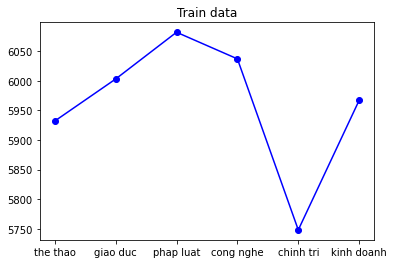

In [ ]:
all_tiitles = ['the thao', 'giao duc', 'phap luat', 'cong nghe', 'chinh tri', 'kinh doanh']
train_number = []
test_number = []
for i in range (6):
  train_number.append(Y_train_dict[all_tiitles[i]])
  test_number.append(Y_test_dict[all_tiitles[i]])
plt.plot(all_tiitles, train_number, 'bo-')
plt.title('Train data')

Text(0.5, 1.0, 'Test data')

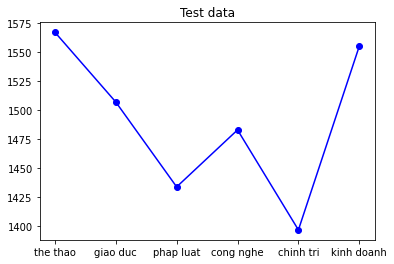

In [ ]:
plt.plot(all_tiitles, test_number, 'bo-')
plt.title('Test data')

In [ ]:
import joblib

path = '/content/drive/My Drive/NLP_data/X_train.sav'
joblib.dump(X_train, path)

#Bước này dùng để lưu tập train để dùng cho phần dự đoán 

['/content/drive/My Drive/NLP_data/X_train.sav']

### **d) Tiến hành xử lý dữ liệu:**

Có nhiều phương pháp phân tích dữ liệu text, phổ biến là dùng *TfidfVectorizer* và đơn giản là sử dụng *CountVecotrize*. Ta sẽ tiến hành tìm hiểu 2 phương pháp xử lí dữ liệu text này

> *  ***CountVectorize:***

>> - Đây là phương pháp tính số lần xuất hiện của một từ trong văn bản. Khi thực hiện, ta sẽ thu được một kết quả trả về một vector biểu diễn các từ và số lần từ đó xuất hiện có trong văn bản.
 

> *    ***TfidfVectorizer***

>> - Đây là phương pháp tính trọng số của từ xuất hiện trong văn bản. Trọng số càng lớn thì độ quan trọng của từ đó càng cao.
>> - TF: là tần số từ đó xuất hiện trong văn bản. Vì 1 văn bản cần xử lý có thể dài ngắn khác nhau, nên để thấy được độ quan trọng của từ đó, ta có thể tính bằng tf(w,d) = f(w, d)/max({r_w, d | r_w ∈ d}).

>>> Trong đó: 
>>> - tf(t, d): tần suất xuất hiện của từ t trong văn bản d
>>> - f(t, d): Số lần xuất hiện của từ t trong văn bản d
>>> - max({r_w,d | r_w ∈ d}): Số lần xuất hiện của từ có số lần xuất hiện nhiều nhất trong văn bản d
>> - IDF: giúp đánh giá độ quan trọng của một từ bằng cách tính log nghịch đảo của tỉ lệ số văn bản xuất hiện từ đang xét với tổng số văn bản. Được tính bởi công thức idf(w, D) = log(|D|/{d∈D, w∈d}). Ta có thể một cách đơn giản là một từ mà văn bản nào mà nó cũng xuất hiện thì nó không quan trọng là mấy
>>> Trong đó:
>>> - idf(w, D): giá trị idf của từ w trong tập văn bản
>>> - |D|: tổng số văn bản trong tập D
>>> - {d ∈ D : t ∈ d}: số văn bản có từ w trong tập D


CountVecotrize

In [ ]:
from sklearn.feature_extraction.text import  CountVectorizer
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')

count_vect.fit(X_train) #tạo bộ từ vựng
X_train_countvec = count_vect.transform(X_train)  #chuyển data dựa vào bộ từ vựng
X_test_countvec = count_vect.transform(X_test) #chuyển data dựa vào bộ từ vựng

TfidfVectorize( Word Level )

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(analyzer='word', max_features=100000)  #lựa chọn số từ vào vocabulary
tfidf.fit(X_train)  #tạo bộ từ vựng
X_train_tfidf_wordlevel =  tfidf.transform(X_train)  #chuyển data dựa vào bộ từ vựng
X_test_tfidf_wordlevel =  tfidf.transform(X_test)  #chuyển data dựa vào bộ từ vựng

Tiến hành mã hóa label

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
Y_train_encode = encoder.fit_transform(Y_train)
Y_test_encode = encoder.fit_transform(Y_test)
print(encoder.transform(['chinh tri', 'cong nghe', 'giao duc','kinh doanh', 'phap luat', 'the thao']))

[0 1 2 3 4 5]


## **2.Chọn model và tiến hành train**

Sử dụng 3 model cơ bản để so sánh
> *    LogisticRegression
> *    RandomForestClassifier
> *    LinearSVC

Sử dụng bộ từ vựng được tạo bởi TfidfVectorizer word level

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
LR = LogisticRegression()
LR_countvec = LogisticRegression()
RFC_countvec = RandomForestClassifier()
RFC = RandomForestClassifier()
LSVC_countvec = LinearSVC()
LSVC = LinearSVC()

LinearSVC

In [ ]:
LSVC.fit(X_train_tfidf_wordlevel, Y_train_encode)
prediction=LSVC.predict(X_test_tfidf_wordlevel)
from sklearn.metrics import classification_report
print(classification_report(Y_test_encode, prediction))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      1397
           1       0.90      0.89      0.89      1483
           2       0.91      0.92      0.92      1507
           3       0.86      0.87      0.87      1555
           4       0.94      0.93      0.93      1434
           5       0.98      0.98      0.98      1567

    accuracy                           0.92      8943
   macro avg       0.92      0.91      0.91      8943
weighted avg       0.92      0.92      0.92      8943



In [ ]:
LSVC_countvec.fit(X_train_countvec, Y_train_encode)
prediction=LSVC_countvec.predict(X_test_countvec)
print(classification_report(Y_test_encode, prediction))

              precision    recall  f1-score   support

           0       0.88      0.89      0.88      1397
           1       0.88      0.88      0.88      1483
           2       0.89      0.92      0.90      1507
           3       0.86      0.84      0.85      1555
           4       0.93      0.92      0.92      1434
           5       0.98      0.97      0.98      1567

    accuracy                           0.90      8943
   macro avg       0.90      0.90      0.90      8943
weighted avg       0.90      0.90      0.90      8943



Tiến hành lưu model LinearSVC

In [ ]:
import joblib

path = '/content/drive/My Drive/FinalModel/LSVC.sav'  #khởi tạo đường dẫn để lưu model
joblib.dump(LSVC, path)

['/content/drive/My Drive/FinalModel/LSVC.sav']

LogisticRegression

In [ ]:
LR.fit(X_train_tfidf_wordlevel, Y_train_encode)
prediction=LR.predict(X_test_tfidf_wordlevel)
from sklearn.metrics import classification_report
print(classification_report(Y_test_encode, prediction))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89      1397
           1       0.89      0.88      0.89      1483
           2       0.92      0.91      0.91      1507
           3       0.83      0.88      0.86      1555
           4       0.94      0.92      0.93      1434
           5       0.98      0.97      0.97      1567

    accuracy                           0.91      8943
   macro avg       0.91      0.91      0.91      8943
weighted avg       0.91      0.91      0.91      8943



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
LR_countvec.fit(X_train_countvec, Y_train_encode)
prediction=LR_countvec.predict(X_test_countvec)
print(classification_report(Y_test_encode, prediction))

              precision    recall  f1-score   support

           0       0.88      0.89      0.89      1397
           1       0.89      0.87      0.88      1483
           2       0.91      0.91      0.91      1507
           3       0.84      0.86      0.85      1555
           4       0.94      0.91      0.93      1434
           5       0.98      0.97      0.98      1567

    accuracy                           0.90      8943
   macro avg       0.91      0.90      0.90      8943
weighted avg       0.91      0.90      0.91      8943



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Tiến hành lưu model LogisticRegression

In [ ]:
import joblib

path = '/content/drive/My Drive/FinalModel/LR.sav'  #khởi tạo đường dẫn để lưu model
joblib.dump(LR, path)

['/content/drive/My Drive/FinalModel/LR.sav']

RandomForestClasifier 

In [ ]:
RFC.fit(X_train_tfidf_wordlevel, Y_train_encode)
prediction=RFC.predict(X_test_tfidf_wordlevel)
from sklearn.metrics import classification_report
print(classification_report(Y_test_encode, prediction))

              precision    recall  f1-score   support

           0       0.86      0.87      0.87      1397
           1       0.88      0.84      0.86      1483
           2       0.90      0.89      0.89      1507
           3       0.78      0.83      0.81      1555
           4       0.88      0.88      0.88      1434
           5       0.97      0.96      0.96      1567

    accuracy                           0.88      8943
   macro avg       0.88      0.88      0.88      8943
weighted avg       0.88      0.88      0.88      8943



In [ ]:
RFC_countvec.fit(X_train_countvec, Y_train_encode)
prediction=RFC_countvec.predict(X_test_countvec)
print(classification_report(Y_test_encode, prediction))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1397
           1       0.88      0.84      0.86      1483
           2       0.89      0.89      0.89      1507
           3       0.79      0.83      0.81      1555
           4       0.89      0.88      0.89      1434
           5       0.97      0.96      0.96      1567

    accuracy                           0.88      8943
   macro avg       0.88      0.88      0.88      8943
weighted avg       0.88      0.88      0.88      8943



Tiến hành lưu model RandomForestClasifier

In [ ]:
import joblib

path = '/content/drive/My Drive/FinalModel/RFC.sav'  #khởi tạo đường dẫn để lưu model
joblib.dump(RFC, path)

['/content/drive/My Drive/FinalModel/RFC.sav']

#**IV - Fine Tuning**

##**1. Sử dụng TfidfVectorize với ngram-word level**

TfidfVectorize

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_ngram = TfidfVectorizer(analyzer='word', max_features=100000, ngram_range=(2,3))  #lựa chọn số từ vào vocabulary
tfidf_ngram.fit(X_train)  #tạo bộ từ vựng
X_train_tfidf_nwordlevel =  tfidf_ngram.transform(X_train)  #chuyển data dựa vào bộ từ vựng
X_test_tfidf_nwordlevel =  tfidf_ngram.transform(X_test)  #chuyển data dựa vào bộ từ vựng

Sử dụng TruncatedSVD nhằm giảm chiều dữ liệu của ma trận nhưng vẫn giữ nguyên các đặc trưng

In [ ]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=300, random_state=42) #Ta sẽ giảm số chiều xuống còn 300
svd.fit(X_train_tfidf_nwordlevel)
X_train_svd_nwordlevel = svd.transform(X_train_tfidf_nwordlevel)
X_test_svd_nwordlevel = svd.transform(X_test_tfidf_nwordlevel)

##**2. Sử dụng TfidfVectorize với ngram-char level**

TfidfVectorize ngram-char level

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_ngram = TfidfVectorizer(analyzer='char', max_features=100000, ngram_range=(2,3))  #lựa chọn số từ vào vocabulary
tfidf_ngram.fit(X_train)  #tạo bộ từ vựng
X_train_tfidf_ncharlevel =  tfidf_ngram.transform(X_train)  #chuyển data dựa vào bộ từ vựng
X_test_tfidf_ncharlevel =  tfidf_ngram.transform(X_test)  #chuyển data dựa vào bộ từ vựng

Sử dụng TruncatedSVD nhằm giảm chiều dữ liệu của ma trận nhưng vẫn giữ nguyên các đặc trưng

In [ ]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=300, random_state=42)
svd.fit(X_train_tfidf_ncharlevel)
X_train_svd_ncharlevel = svd.transform(X_train_tfidf_ncharlevel)
X_test_svd_ncharlevel = svd.transform(X_test_tfidf_ncharlevel)

**Thử train data với mô hình DNN đơn giản**

Ở đây em sẽ sử dụng TruncatedSVD với dữ liệu ngram-word level

Phân chia dữ liệu

In [ ]:
X_train_new, X_val_new, Y_train_new, Y_val_new = train_test_split(X_train_svd_nwordlevel, Y_train_encode, test_size=0.15, random_state=42)

In [ ]:
from keras.layers import Reshape, Bidirectional, GRU
from sklearn import metrics
from keras import Model
from keras import optimizers
from keras import Input
from keras.layers import Dense

*Khởi tạo mô hình*

Công thức hàm kích hoạt ReLU: f(x) = max(0,x), do đó đơn giản hàm này lọc các giá trị nhỏ hơn 0

In [ ]:
#%tensorflow_version 1.x
import tensorflow
from tensorflow import sparse
input_layer = Input(shape=(300,))  #Khởi tạo một layer input với shpe = (300,) vì ở giai đoạn giảm chiều dữ liệu, em đã giảm xuống còn 300
layer = Dense(512, activation='relu')(input_layer)  #Hiden layer với số neuron trong layer, hàm kích hoạt là hàm relu
layer = Dense(512, activation='relu')(layer)
layer = Dense(256, activation='relu')(layer)
layer = Dense(128, activation='relu')(layer)
layer = Dense(64, activation='relu')(layer)
output_layer = Dense(6, activation='softmax')(layer)   # Khởi tạo layer out_put, vì có 6 class nên số neuron hàm out_put là 6, hàm kích hoạt out_put sẽ là softmax
    
DNN = Model(input_layer, output_layer)
DNN.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

DNN.fit(X_train_new, Y_train_new, validation_data=(X_val_new, Y_val_new), epochs=10, batch_size=512)
      
val_predictions = DNN.predict(X_val_new)
test_predictions = DNN.predict(X_test_svd_nwordlevel)
val_predictions = val_predictions.argmax(axis=-1)
test_predictions = test_predictions.argmax(axis=-1)

print("Validation accuracy: ", metrics.accuracy_score(val_predictions, Y_val_new))  #xác nhận chính xác
print("Test accuracy: ", metrics.accuracy_score(test_predictions, Y_test_encode))   #test chính xác

Epoch 1/10
60/60 [==============================] - 3s 42ms/step - loss: 1.3201 - accuracy: 0.5043 - val_loss: 0.9824 - val_accuracy: 0.6223
Epoch 2/10
60/60 [==============================] - 2s 41ms/step - loss: 0.9092 - accuracy: 0.6696 - val_loss: 0.8574 - val_accuracy: 0.6906
Epoch 3/10
60/60 [==============================] - 2s 40ms/step - loss: 0.8271 - accuracy: 0.7012 - val_loss: 0.8134 - val_accuracy: 0.7136
Epoch 4/10
60/60 [==============================] - 2s 40ms/step - loss: 0.7787 - accuracy: 0.7159 - val_loss: 0.8050 - val_accuracy: 0.7083
Epoch 5/10
60/60 [==============================] - 2s 38ms/step - loss: 0.7409 - accuracy: 0.7301 - val_loss: 0.8053 - val_accuracy: 0.7067
Epoch 6/10
60/60 [==============================] - 2s 38ms/step - loss: 0.7212 - accuracy: 0.7386 - val_loss: 0.7618 - val_accuracy: 0.7287
Epoch 7/10
60/60 [==============================] - 2s 41ms/step - loss: 0.7137 - accuracy: 0.7371 - val_loss: 0.7683 - val_accuracy: 0.7294
Epoch 8/10
60

Và thử với LinearSVC

> * Trong trường hợp ta chưa giảm chiều dữ liệu với TruncatedSVD

In [ ]:
LSVC_finetuning = LinearSVC()
LSVC_finetuning.fit(X_train_tfidf_nwordlevel, Y_train_encode)
prediction=LSVC_finetuning.predict(X_test_tfidf_nwordlevel)
from sklearn.metrics import classification_report
print(classification_report(Y_test_encode, prediction))


              precision    recall  f1-score   support

           0       0.87      0.83      0.85      1397
           1       0.68      0.84      0.75      1483
           2       0.88      0.81      0.85      1507
           3       0.78      0.74      0.76      1555
           4       0.89      0.89      0.89      1434
           5       0.95      0.89      0.92      1567

    accuracy                           0.83      8943
   macro avg       0.84      0.83      0.84      8943
weighted avg       0.84      0.83      0.84      8943



> * Trong trường hợp đã giảm chiều dữ liệu với TruncatedSVD

In [ ]:
LSVC_finetuning = LinearSVC()
LSVC_finetuning.fit(X_train_svd_nwordlevel, Y_train_encode)
prediction=LSVC_finetuning.predict(X_test_svd_nwordlevel)
from sklearn.metrics import classification_report
print(classification_report(Y_test_encode, prediction))

              precision    recall  f1-score   support

           0       0.85      0.63      0.73      1397
           1       0.41      0.81      0.54      1483
           2       0.85      0.60      0.70      1507
           3       0.63      0.53      0.58      1555
           4       0.83      0.75      0.79      1434
           5       0.89      0.72      0.80      1567

    accuracy                           0.67      8943
   macro avg       0.74      0.67      0.69      8943
weighted avg       0.74      0.67      0.69      8943



#**V- NHẬN XÉT:**

**TRONG TRƯỜNG HỢP CHƯA FINE TUNING**
* Ta thấy accuracy của model LinearSVC có accuracy cao nhất (0.92), sau đó là LogisticRegression với accuracy 0.91 và sau cùng là RandomForestClasifier với accuracy là 0.88 (Trường hợp sử dụng TfidfVectorizer word level)
* Trường hợp sử dụng CountVectorizer, accuracy của model LinearSVC và LogisticRegression đạt được 0.90 và RandomForestClassifier đạt được 0.88

=> Feature Engineering sử dụng TfidfVectorizer word level có vẻ tốt hơn CountVectorizer một chút
* Accuracy khá ổn nhờ tập data tốt, và nhiều. Bước xử lý dữ liệu chi tiết

**TRONG TRƯỜNG HỢP FINE TUNING**
* Ta mong muốn trong trường hợp này một kết quả tốt hơn trước khi chưa fine tuning. Nhưng...không, ta nhận lại một kết quả không khả quan cho lắm.
* Sau khi khi tạo bộ từ vựng với nword level, ngram_range=(2,3) thì kết quả khi sử dụng model LinearSVC không còn tốt như trước, mà cụ thể là bây giờ accuracy chỉ còn 0.83
* Sau khi giảm chiều dữ liệu:
   * Dùng mô hình DNN cũng không khả quan cho lắm, accuracy cho tập val và test lần lượt là 0.728 và 0.732
   * Dùng với model LinearSVC kết quả còn tệ hơn, accuracy chỉ còn 0.67
   * Có thể cách fine tuning của em chưa thực sự đạt hiệu quả, mà trái lại, nó đem đến nhiều bất lợi trong quá trình train và predict
   * Mô hình DNN chưa thực sự tốt với tập dữ liệu như thế này, cần phải khắc phục mô hình

#**V - Dự đoán:**

Ta tiến hành dự đoán với mô hình LinearSVC 

In [ ]:
from sklearn.model_selection import train_test_split
X_train_app, X_test_app, Y_train_app, Y_test_app = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
print(encoder.transform(['chinh tri', 'cong nghe', 'giao duc', 'kinh doanh', 'phap luat', 'the thao']))

In [ ]:
import joblib

lines = input()   #input tiêu đề muốn dự đoán

#các bước xử lý tiêu đề đưa vào
lines = gensim.utils.simple_preprocess(lines)
lines = ' '.join(lines) 
lines = ViTokenizer.tokenize(lines)
lines = ''.join(lines)
count_vect = TfidfVectorizer(analyzer='word', max_features=100000)
lines = [lines]
count_vect.fit(X_train_app)
lines = count_vect.transform(lines)
#kết thúc xử lý input

model = joblib.load('/content/drive/My Drive/FinalModel/LSVC.sav')

prediction = model.predict(lines)
if (prediction==0):
  print('Thuộc chủ đề chính trị')
if (prediction==1):
  print('Thuộc chủ đề công nghệ')
if (prediction==2):
  print('Thuộc chủ đề giáo dục')
if (prediction==3):
  print('Thuộc chủ đề kinh doanh')
if (prediction==4):
  print('Thuộc chủ đề pháp luật')
if (prediction==5):
  print('Thuộc chủ đề thể thao')


Thủ phạm giết người ở Đồng Nai nhận án tử
Thuộc chủ đề pháp luật


#**VI - XÂY DỰNG MÔ HÌNH DỰ ĐOÁN VỚI FLASK**

Code được up lên github:
https://github.com/hoangnhan12-arc/CS114.K21.KHTN/tree/master/FINAL_MACHINELEARNING

Link video demo youtube: 
https://www.youtube.com/watch?v=tMEb_1Ici8Q

Tài liệu tham khảo:  https://github.com/NguyenVanHieuBlog/programing-language-identify